In [1]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [2]:
from osgeo import gdal
import rasterio
import rasterio.plot
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [3]:
# Root Directory
Image_Segmentation_Path = '/content/drive/My Drive/Image Segmentation/'

# Inputs/Sources
Tiling_Path = Image_Segmentation_Path + "Tiles Sets/"

#Outputs/Destinations
resized_input = Image_Segmentation_Path + "Resized Sets/"

In [4]:
def get_files(folder, ext="tif"):
    """get all files with a specified extension in a folder"""
    glob_path = Path(folder)
    return [file for file in glob_path.glob(f"*.{ext}")]

In [ ]:
# Hillshade_Tiles_Sets = Tiling_Path + "Hillshade Tiles Sets/32x64 Tiles/0_0.tif"
# tmp = gdal.Open(Hillshade_Tiles_Sets)

In [ ]:
# array = tmp.ReadAsArray()
# array.shape

In [ ]:
p = Path(Tiling_Path)
os.listdir(str(p))

['Annotated Tiles Sets',
 'DEM Tiles Sets',
 'Slope Tiles Sets',
 'Hillshade Tiles Sets',
 'Test DEM Tiles Sets',
 'Test Slope Tiles Sets',
 'Test Hillshade Tiles Sets']

In [ ]:
input = ['/content/drive/My Drive/Image Segmentation/Tiles Sets/Test DEM Tiles Sets/8x16 Tiles/',
         '/content/drive/My Drive/Image Segmentation/Tiles Sets/Test Slope Tiles Sets/8x16 Tiles/',
         '/content/drive/My Drive/Image Segmentation/Tiles Sets/Test Hillshade Tiles Sets/8x16 Tiles/']  

In [ ]:
outputs = ['/content/drive/My Drive/Image Segmentation/Resized Sets/Test DEM Tiles Sets/8x16 Tiles/',
         '/content/drive/My Drive/Image Segmentation/Resized Sets/Test Slope Tiles Sets/8x16 Tiles/',
         '/content/drive/My Drive/Image Segmentation/Resized Sets/Test Hillshade Tiles Sets/8x16 Tiles/']  

In [ ]:
# for i in range(len(input)):
#   files = get_files(input[i])
#   print(len(files))
#   for dem_file in files: 

#     dem = gdal.Open(os.fspath(dem_file))
#     Path(outputs[i]).mkdir(parents=True, exist_ok=True)
#     output = outputs[i] + dem_file.name
#     gdal.Translate(output, dem, width = 192, height = 224)

128
128
128


In [ ]:
resized_sets_paths_list = []
for dir in [x for x in p.iterdir() if x.is_dir()]:
  print()
# for dir in [Tiling_Path+"Test DEM Tiles Sets"]:
  sets_name = resized_input+str(dir.name)+'/'
  Path(sets_name).mkdir(parents=True, exist_ok=True)
  tiles_files_list = []
  for tiles_dir in [y for y in Path(dir).iterdir() if y.is_dir()]:
    resized_sets = sets_name + tiles_dir.name + '/'
    Path(resized_sets).mkdir(parents=True, exist_ok=True)
    tiles_files_list.append(resized_sets)
    for dem_file in get_files(tiles_dir):
      # dem = gdal.Open(os.fspath(dem_file))
      output = resized_sets + dem_file.name
      # gdal.Translate(output, dem, width = 192, height = 224)
  resized_sets_paths_list.append(tiles_files_list)


In [ ]:
resized_sets_paths_list

[['/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/2x4 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/3x6 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/4x8 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/8x16 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/16x32 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/Annotated Tiles Sets/32x64 Tiles/'],
 ['/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/2x4 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/3x6 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/4x8 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/8x16 Tiles/',
  '/content/drive/My Drive/Image Segmentation/Resized Sets/DEM Tiles Sets/16x32 Tiles/'

In [5]:
import pandas as pd

In [6]:
# plot_train_path = Image_Segmentation_Path + "DataFrames/plot_train.csv"
train_df_path = Image_Segmentation_Path + "DataFrames/three_channel_train_with_gan_new.csv"

In [7]:
df_train = pd.read_csv(train_df_path)

In [ ]:
def get_num_name(path):
  num1, num2 = path.split("/")[-1].replace(".tif", "").split("_")
  return (int(num1), int(num2))

In [8]:
# origin_2x4_tiles = resized_sets_paths_list[6][0]
path1 = '/content/drive/My Drive/Image Segmentation/Resized Sets/bezierGAN/label/'
path2 = '/content/drive/My Drive/Image Segmentation/Resized Sets/bezierGAN/prediction/'
files1 = [str(file_path) for file_path in get_files(path1, ext='jpg')]
files2 = [str(file_path) for file_path in get_files(path2, ext='jpg')]

In [9]:
files1.sort()
files2.sort()

In [ ]:
# dic = {file_path:get_num_name(file_path) for file_path in files}

In [ ]:
# to_sort = dic.items()

In [ ]:
# dic = sorted(to_sort,key=lambda x:(x[1][0], x[1][1]))

In [ ]:
# files = [file[0] for file in dic]

In [10]:
add = pd.DataFrame()

In [11]:
add['origin'] = files2

In [12]:
add['mask'] = files1

In [13]:
add.reset_index(drop=True)
df_train = df_train[['origin', 'slope', 'hillshade', 'mask']]
df_train = pd.concat([df_train, add], sort=False)
df_train.reset_index(drop=True)

,origin,slope,hillshade,mask
0,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
1,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
2,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
3,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
4,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
...,...,...,...,...
3923,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...
3924,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...
3925,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...
3926,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...


In [14]:
df_train.to_csv(train_df_path+"new", index=False)

In [ ]:
train_df = pd.concat([train_df, add], sort=False)

In [ ]:
train_df.reset_index(drop=True)

,origin,slope,hillshade,mask
0,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
1,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
2,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
3,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
4,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
...,...,...,...,...
1875,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...
1876,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...
1877,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...
1878,/content/drive/My Drive/Image Segmentation/Res...,NaN,NaN,/content/drive/My Drive/Image Segmentation/Res...


In [ ]:
df_train.to_csv(train_df_path+"new", index=False)

In [ ]:
# plot_test_path = Image_Segmentation_Path + "DataFrames/plot_test.csv"
# plot_test.to_csv(plot_test_path)

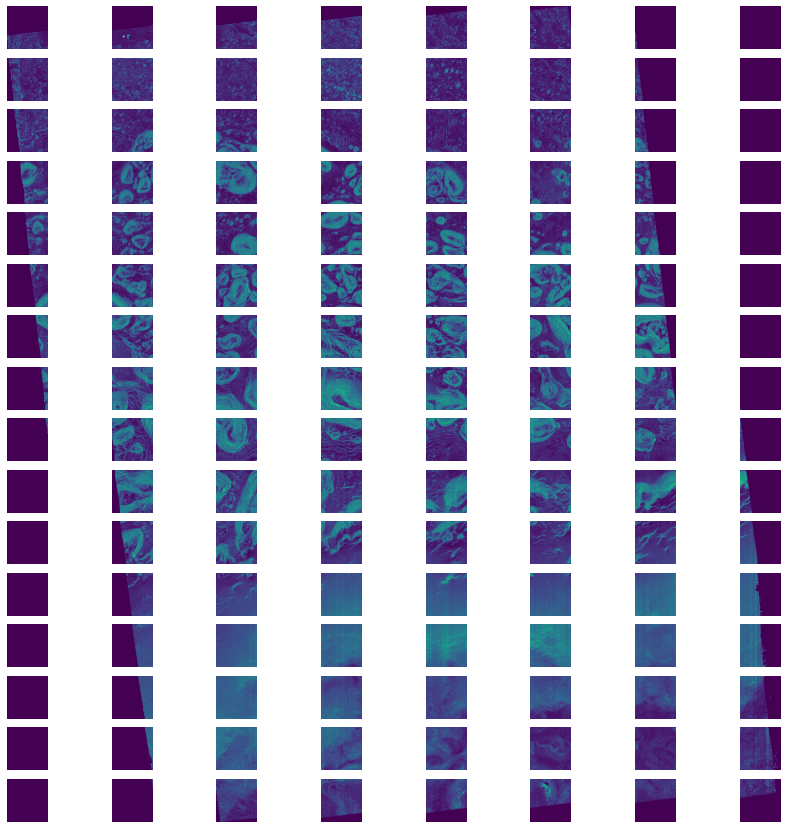

In [ ]:
# Plot one resized set path

# 8x16 tiles ==> subplot(16,8)
fig, ax = plt.subplots(16, 8, figsize=(15, 15))
plt.subplots_adjust(wspace =0.000001)
ax = ax.flatten('F')
i=0
for file_path in files:
  with rasterio.open(file_path) as tile:
    # print(tile.shape)
    ax[i].axis('off')
    rasterio.plot.show(tile, ax=ax[i])
    i+=1